Лабораторна робота №1 <br>
Виконала: Ахламова Анна

TASK 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

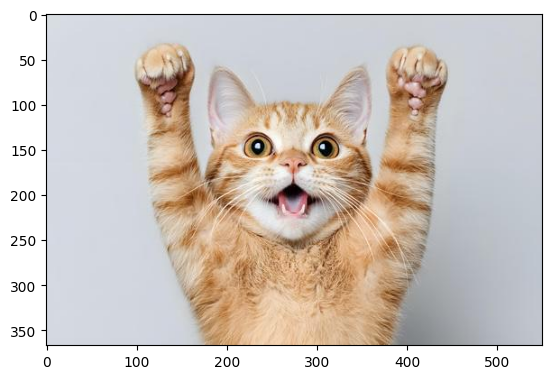

In [43]:
image_data = mpimg.imread('cat.jpg')
plt.imshow(image_data)

In [18]:
def converter(img):
    height = len(img)
    width = len(img[0])
    points = []
    for y in range(height):
        for x in range(width):
            pixel = img[y][x]
            r = pixel[0]
            g = pixel[1]
            b = pixel[2]
            points.append([x, y, r, g, b])
    return points
points = converter(image_data)
points = np.array(points, dtype=float)
points

array([[  0.,   0., 216., 221., 225.],
       [  1.,   0., 216., 221., 225.],
       [  2.,   0., 216., 221., 225.],
       ...,
       [547., 366., 191., 195., 204.],
       [548., 366., 191., 195., 204.],
       [549., 366., 191., 195., 204.]])

Щоб не писати постійно один й той самий код для малювання графіку виносимо його в окрему функцію

In [4]:
def convert_back(smth):
    x = smth[:, 0]
    y= smth[:, 1]
    colors = smth[:, 2:5]

    if colors.max() > 1.0:
        colors = colors / 255.0

    plt.scatter(x, -y, c=colors)
    plt.axis('equal')
    plt.show()

In [19]:
def stretch(points, a, b):
    A = np.array([
        [a, 0, 0, 0, 0],
        [0, b, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
    ], dtype=float)
    return points @ A

stretched = stretch(points, 2, 0.7)
stretched

array([[   0. ,    0. ,  216. ,  221. ,  225. ],
       [   2. ,    0. ,  216. ,  221. ,  225. ],
       [   4. ,    0. ,  216. ,  221. ,  225. ],
       ...,
       [1094. ,  256.2,  191. ,  195. ,  204. ],
       [1096. ,  256.2,  191. ,  195. ,  204. ],
       [1098. ,  256.2,  191. ,  195. ,  204. ]])

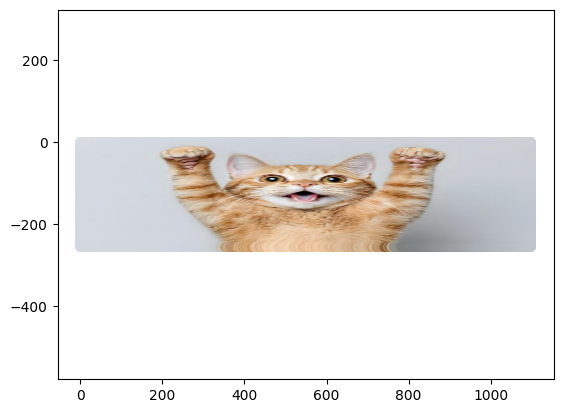

In [20]:
convert_image=convert_back(stretched)

In [21]:
def shear(points, a, b):
    A = np.array([
        [1, a, 0, 0, 0],
        [b, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
    ], dtype=float)
    return points @ A

shearted = shear(points, 0.5, 0)
shearted

array([[0.000e+00, 0.000e+00, 2.160e+02, 2.210e+02, 2.250e+02],
       [1.000e+00, 5.000e-01, 2.160e+02, 2.210e+02, 2.250e+02],
       [2.000e+00, 1.000e+00, 2.160e+02, 2.210e+02, 2.250e+02],
       ...,
       [5.470e+02, 6.395e+02, 1.910e+02, 1.950e+02, 2.040e+02],
       [5.480e+02, 6.400e+02, 1.910e+02, 1.950e+02, 2.040e+02],
       [5.490e+02, 6.405e+02, 1.910e+02, 1.950e+02, 2.040e+02]])

In [ ]:
shearted_image=convert_back(shearted)

In [17]:
def rotation(points, teta):
    teta = np.deg2rad(teta)
    A = np.array([
        [np.cos(teta), -np.sin(teta), 0, 0, 0],
        [np.sin(teta), np.cos(teta), 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
    ], dtype=float)
    return points @ A

rot = rotation(points, 45)
rot

array([[   0.        ,    0.        ,  216.        ,  221.        ,
         225.        ],
       [   0.70710678,   -0.70710678,  216.        ,  221.        ,
         225.        ],
       [   1.41421356,   -1.41421356,  216.        ,  221.        ,
         225.        ],
       ...,
       [ 645.58849122, -127.98632739,  191.        ,  195.        ,
         204.        ],
       [ 646.295598  , -128.69343418,  191.        ,  195.        ,
         204.        ],
       [ 647.00270479, -129.40054096,  191.        ,  195.        ,
         204.        ]])

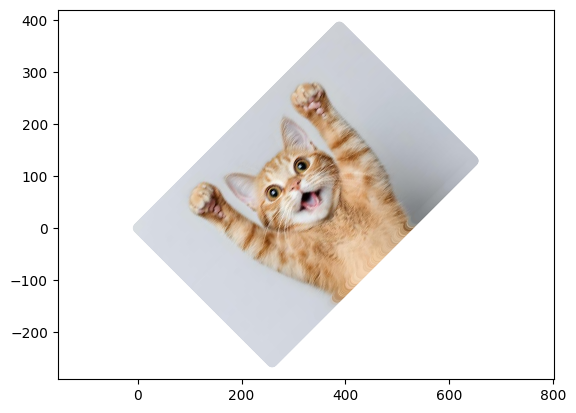

In [22]:
rotated_image=convert_back(rot)

In [23]:
def reflection(points, a, b):
    A2 = np.array([
        [a**2 - b**2, 2*a*b],
        [2*a*b, b**2 - a**2]
    ], dtype=float) / (a**2 + b**2)
    A = np.array([
        [A2[0,0], A2[0,1], 0, 0, 0],
        [A2[1,0], A2[1,1], 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
    ], dtype=float)
    return points @ A

ref = reflection(points, 1, -1)
ref

array([[   0.,    0.,  216.,  221.,  225.],
       [   0.,   -1.,  216.,  221.,  225.],
       [   0.,   -2.,  216.,  221.,  225.],
       ...,
       [-366., -547.,  191.,  195.,  204.],
       [-366., -548.,  191.,  195.,  204.],
       [-366., -549.,  191.,  195.,  204.]])

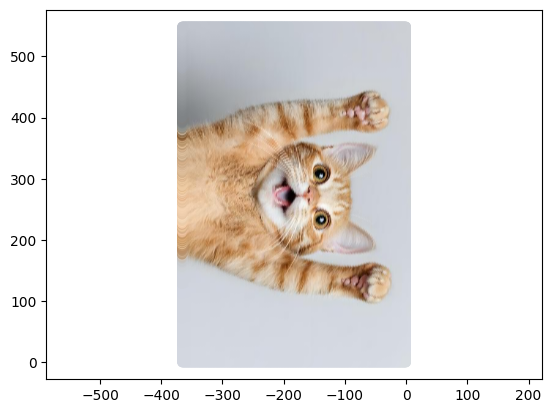

In [24]:
reflected_image=convert_back(ref)

TASK 2

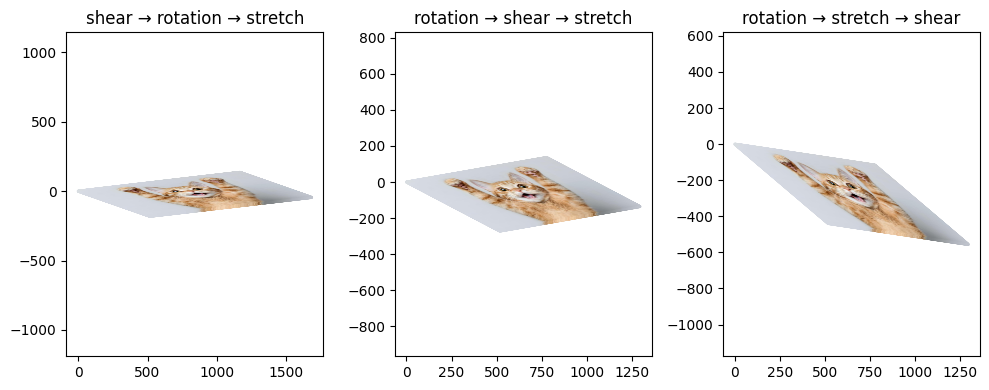

In [41]:
def art_axes(ax, points):
    x = points[:, 0]
    y = points[:, 1]
    colors = points[:, 2:5]
    if colors.max() > 1.0:
        colors = colors / 255.0
    ax.scatter(x, -y, c=colors, s=1)
    ax.axis('equal')


fig, axes = plt.subplots(1, 3, figsize=(10, 4)) # sharex=True, sharey=True команди щоб зробити однакову шкалу по x and y

rot_shear         = rotation(shearted, 45)
rot_shear_stretch = stretch(rot_shear, 2.0, 0.7)
art_axes(axes[0], rot_shear_stretch)
axes[0].set_title("shear → rotation → stretch")

shear_rotation    = shear(rot, 0.5, 0)
stretch_shear_rot = stretch(shear_rotation, 2.0, 0.7)
art_axes(axes[1], stretch_shear_rot)
axes[1].set_title("rotation → shear → stretch")

stretched_rot     = stretch(rot, 2.0, 0.7)
shear_stretch_rot = shear(stretched_rot, 0.5, 0)
art_axes(axes[2], shear_stretch_rot)
axes[2].set_title("rotation → stretch → shear")

plt.tight_layout()
plt.show()

In [42]:
shear_stretch_rot

array([[0.00000000e+00, 0.00000000e+00, 2.16000000e+02, 2.21000000e+02,
        2.25000000e+02],
       [1.41421356e+00, 2.12132034e-01, 2.16000000e+02, 2.21000000e+02,
        2.25000000e+02],
       [2.82842712e+00, 4.24264069e-01, 2.16000000e+02, 2.21000000e+02,
        2.25000000e+02],
       ...,
       [1.29117698e+03, 5.55998062e+02, 1.91000000e+02, 1.95000000e+02,
        2.04000000e+02],
       [1.29259120e+03, 5.56210194e+02, 1.91000000e+02, 1.95000000e+02,
        2.04000000e+02],
       [1.29400541e+03, 5.56422326e+02, 1.91000000e+02, 1.95000000e+02,
        2.04000000e+02]])

In [39]:
rot_shear_stretch

array([[ 0.00000000e+00,  0.00000000e+00,  2.16000000e+02,
         2.21000000e+02,  2.25000000e+02],
       [ 2.12132034e+00, -2.47487373e-01,  2.16000000e+02,
         2.21000000e+02,  2.25000000e+02],
       [ 4.24264069e+00, -4.94974747e-01,  2.16000000e+02,
         2.21000000e+02,  2.25000000e+02],
       ...,
       [ 1.67796439e+03,  4.57851641e+01,  1.91000000e+02,
         1.95000000e+02,  2.04000000e+02],
       [ 1.68008571e+03,  4.55376767e+01,  1.91000000e+02,
         1.95000000e+02,  2.04000000e+02],
       [ 1.68220703e+03,  4.52901893e+01,  1.91000000e+02,
         1.95000000e+02,  2.04000000e+02]])

In [40]:
stretch_shear_rot

array([[ 0.00000000e+00,  0.00000000e+00,  2.16000000e+02,
         2.21000000e+02,  2.25000000e+02],
       [ 1.41421356e+00, -2.47487373e-01,  2.16000000e+02,
         2.21000000e+02,  2.25000000e+02],
       [ 2.82842712e+00, -4.94974747e-01,  2.16000000e+02,
         2.21000000e+02,  2.25000000e+02],
       ...,
       [ 1.29117698e+03,  1.36365543e+02,  1.91000000e+02,
         1.95000000e+02,  2.04000000e+02],
       [ 1.29259120e+03,  1.36118055e+02,  1.91000000e+02,
         1.95000000e+02,  2.04000000e+02],
       [ 1.29400541e+03,  1.35870568e+02,  1.91000000e+02,
         1.95000000e+02,  2.04000000e+02]])

TASK 3 <br>
Зчитуємо файл для 3-Д графіки (так як було в прикладі)

In [28]:
def read_off(filename: str):
    with open(filename, 'r') as f:
        if 'OFF' != f.readline().strip():
            raise ValueError('Not a valid OFF header')
        n_verts, n_faces, _ = map(int, f.readline().strip().split())
        verts = [list(map(float, f.readline().strip().split())) for _ in range(n_verts)]
        faces = [list(map(int, f.readline().strip().split()[1:])) for _ in range(n_faces)]
        return np.array(verts), faces

vertices, faces = read_off(r"C:\Users\Inna\Downloads\archive (1)\ModelNet40\toilet\test\toilet_0349.off")

print(vertices.shape)
print(faces[:3])
print(vertices)

(6132, 3)
[[0, 1, 2], [1, 0, 3], [8, 9, 10]]
[[ 8.63051  13.8698   14.450024]
 [ 8.49998  13.87836  13.700024]
 [ 8.49998  13.87836  14.450024]
 ...
 [ 3.88027   6.76595   0.100023]
 [ 2.31277   6.76595  -0.399977]
 [ 2.31277   6.76595   0.100023]]


Функцію для малювання нашого об'єкту

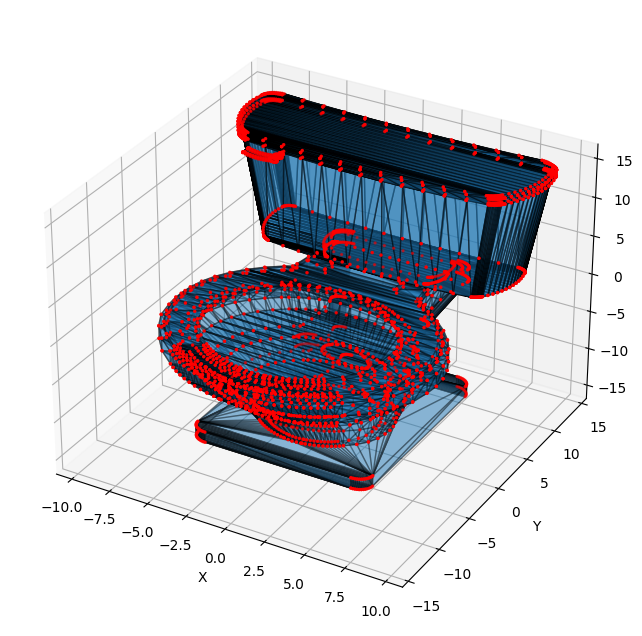

In [29]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_off(vertices, faces):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection([vertices[face] for face in faces],
                            alpha=0.3, edgecolor='k')
    ax.add_collection3d(mesh)
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], s=2, c='r')

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    ax.auto_scale_xyz(vertices[:, 0], vertices[:, 1], vertices[:, 2])
    plt.show()

plot_off(vertices, faces)


In [31]:
def rotate_xy(X, theta):
    theta = np.deg2rad(theta)
    R = np.array([
        [ np.cos(theta), -np.sin(theta), 0],
        [ np.sin(theta),  np.cos(theta), 0],
        [ 0,              0,             1]
    ], dtype=float)
    X_new = X.copy() @ R
    print(R)
    return X_new

rotxy=rotate_xy(vertices, 45)
rotxy

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


array([[15.91012178,  3.70473749, 14.450024  ],
       [15.82387597,  3.80308897, 13.700024  ],
       [15.82387597,  3.80308897, 14.450024  ],
       ...,
       [ 7.52801436,  2.0404839 ,  0.100023  ],
       [ 6.41962448,  3.14887378, -0.399977  ],
       [ 6.41962448,  3.14887378,  0.100023  ]])

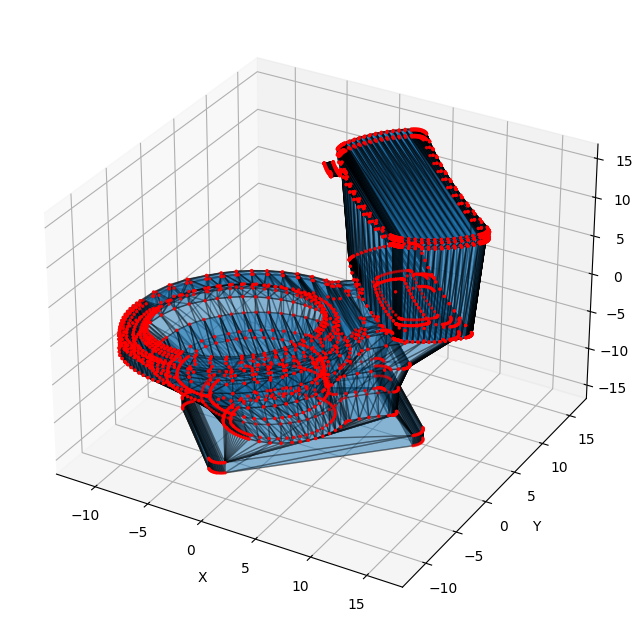

In [32]:
plot_off(rotxy, faces)

In [33]:
def rotate_yz(X, theta):
    theta = np.deg2rad(theta)
    R = np.array([
        [ 1, 0,              0],
        [ 0, np.cos(theta), -np.sin(theta)],
        [ 0, np.sin(theta),  np.cos(theta)]
    ], dtype=float)
    X_new = X.copy() @ R
    print(R)
    return X_new
rotyz=rotate_yz(vertices, 45)
rotyz

[[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]]


array([[ 8.63051   , 20.02513959,  0.41028033],
       [ 8.49998   , 19.50086234, -0.12610259],
       [ 8.49998   , 20.03119243,  0.40422749],
       ...,
       [ 3.88027   ,  4.85497607, -4.71352218],
       [ 2.31277   ,  4.50142268, -5.06707558],
       [ 2.31277   ,  4.85497607, -4.71352218]])

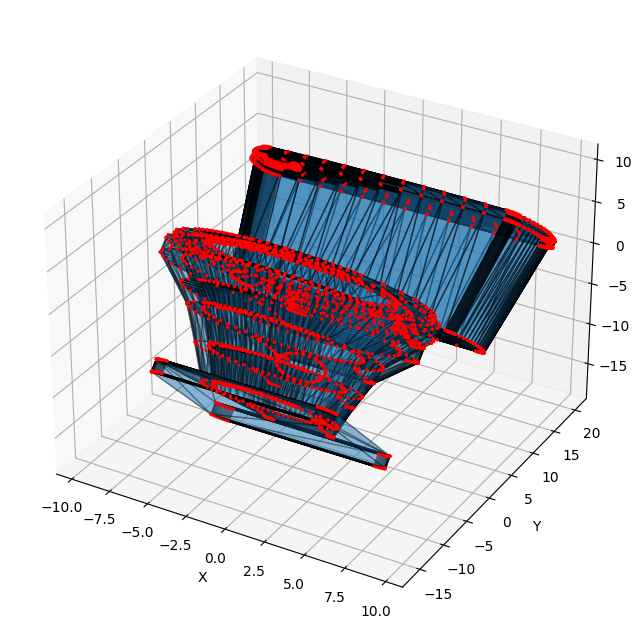

In [34]:
plot_off(rotyz, faces)

In [36]:
def rotate_xz(X, theta):
    theta = np.deg2rad(theta)
    R = np.array([
        [ np.cos(theta), 0, -np.sin(theta)],
        [ 0,             1, 0],
        [np.sin(theta), 0, np.cos(theta)]
    ], dtype=float)
    X_new = X.copy() @ R
    print(R)
    return X_new

rotxz=rotate_xz(vertices, 45)
rotxz

[[ 0.70710678  0.         -0.70710678]
 [ 0.          1.          0.        ]
 [ 0.70710678  0.          0.70710678]]


array([[16.3204021 , 13.8698    ,  4.11501781],
       [15.69777337, 13.87836   ,  3.67698637],
       [16.22810346, 13.87836   ,  4.20731646],
       ...,
       [ 2.81449217,  6.76595   , -2.67303829],
       [ 1.3525489 ,  6.76595   , -1.9182018 ],
       [ 1.70610229,  6.76595   , -1.56464841]])

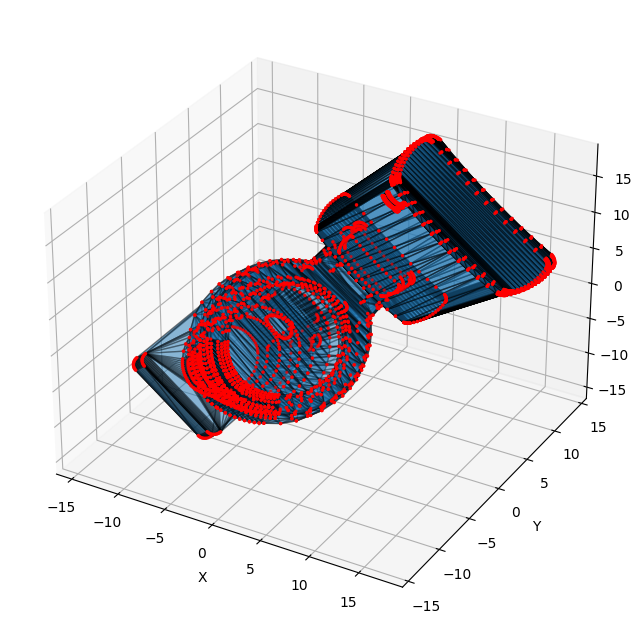

In [37]:
plot_off(rotxz, faces)

TASK 4

[[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]]
[[ 0.70710678  0.         -0.70710678]
 [ 0.          1.          0.        ]
 [ 0.70710678  0.          0.70710678]]
[[ 0.70710678  0.         -0.70710678]
 [ 0.          1.          0.        ]
 [ 0.70710678  0.          0.70710678]]
[[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]]
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
[[ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]
 [ 0.          0.70710678  0.70710678]]


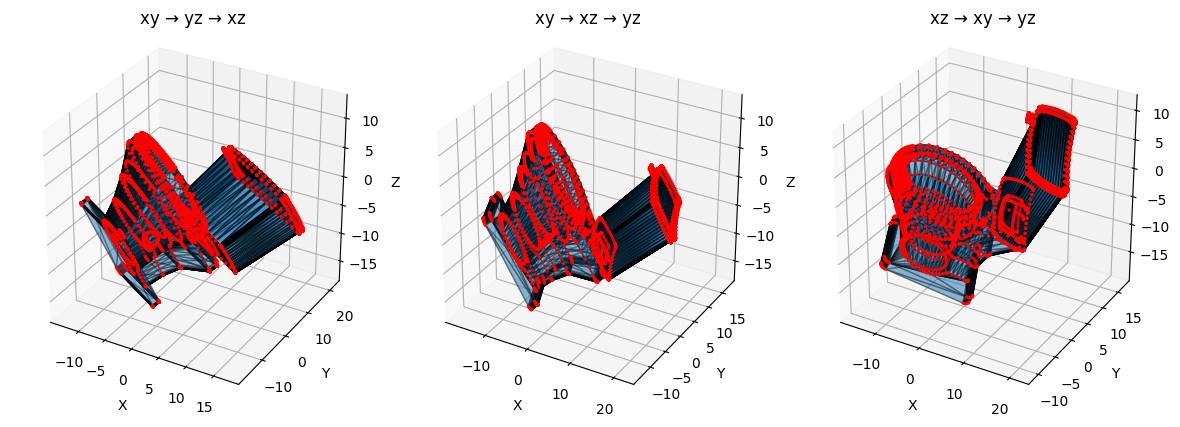

In [56]:
def plot_off_ax(ax, vertices, faces, title=""):
    mesh = Poly3DCollection([vertices[face] for face in faces],
                            alpha=0.3, edgecolor='k')
    ax.add_collection3d(mesh)
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], s=2, c='r')
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_box_aspect([1, 1, 1])

fig, axes = plt.subplots(1, 3, figsize=(12, 4),
                         subplot_kw={'projection': '3d'})

rot_xy_yz = rotate_yz(rotxy, 45)
rot_xy_yz_xz = rotate_xz(rot_xy_yz, 45)
plot_off_ax(axes[0], rot_xy_yz_xz, faces, "xy → yz → xz")

rot_xy_xz = rotate_xz(rotxy, 45)
rot_xy_xz_yz = rotate_yz(rot_xy_xz, 45)
plot_off_ax(axes[1], rot_xy_xz_yz, faces, "xy → xz → yz")

rot_xz_xy = rotate_xy(rotxz, 45)
rot_xz_xy_yz = rotate_yz(rot_xz_xy, 45)
plot_off_ax(axes[2], rot_xz_xy_yz, faces, "xz → xy → yz")

plt.tight_layout()
plt.show()


In [45]:
rot_xy_yz_xz

array([[16.62279826, 12.83735496, -5.87751174],
       [16.13763752, 12.37656987, -6.24070248],
       [16.51263752, 12.90689996, -5.86570248],
       ...,
       [ 4.35287955,  1.51356694, -6.29334045],
       [ 2.76493461,  1.94376355, -6.31378539],
       [ 3.01493461,  2.29731694, -6.06378539]])

In [46]:
rot_xy_xz_yz

array([[21.46786496,  1.88959611, -3.34969389],
       [20.87654987,  1.62726402, -3.75111598],
       [21.40687996,  2.00226402, -3.37611598],
       ...,
       [ 5.39383694, -2.27115568, -5.15683568],
       [ 4.25653355, -1.18321074, -5.63639074],
       [ 4.61008694, -0.93321074, -5.38639074]])

In [50]:
rot_xz_xy_yz

array([[21.34769663,  1.68445595,  4.13505805],
       [20.91348447,  1.69031531,  3.50972869],
       [21.28848447,  1.80015027,  4.14989373],
       ...,
       [ 6.77439563,  0.08560541, -3.86585241],
       [ 5.74064563,  1.35032705, -4.06307405],
       [ 5.99064563,  1.42355035, -3.63629735]])